In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
normal_df = pd.read_csv('/content/drive/My Drive/thesis/swat/SWaT_Dataset_Normal_v0.csv')
attack_df = pd.read_csv('/content/drive/My Drive/thesis/swat/SWaT_Dataset_Attack_v0.csv')

In [ ]:
combined_df = pd.concat([normal_df, attack_df], ignore_index=True)

In [ ]:
mode = combined_df["Normal/Attack"].mode()[0]
combined_df["Normal/Attack"].fillna(mode, inplace=True)
combined_df['Normal/Attack'] = combined_df['Normal/Attack'].replace('A ttack', 'Attack')

<ipython-input-5-3bd453c567e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df["Normal/Attack"].fillna(mode, inplace=True)


In [ ]:
columns_with_null = combined_df.columns[combined_df.isnull().any()]

for column in columns_with_null:
    median_value = combined_df[column].median()
    combined_df[column].fillna(median_value, inplace=True)

In [ ]:
combined_df['Timestamp'] = combined_df['Timestamp'].str.strip()
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])

<ipython-input-7-522d30638157>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])


In [ ]:
X = combined_df.drop(columns=['Timestamp','Normal/Attack'], axis=1)
y= combined_df['Normal/Attack']
y = y.reset_index(drop=True)

In [ ]:
numerical_features = []
categorical_features = []

for column in X.columns:
    unique_values = X[column].nunique()
    if unique_values > 10:
        numerical_features.append(column)
    else:
        categorical_features.append(column)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import OneHotEncoder


numerical_data = combined_df[numerical_features]
categorical_data = combined_df[categorical_features]

# Min-Max scaling for numerical features
scaler = MinMaxScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)
numerical_data_scaled_df = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)

# One-hot encoding for categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(categorical_data)

categorical_feature_names = encoder.get_feature_names_out(categorical_data.columns)
categorical_data_encoded = encoder.transform(categorical_data)
categorical_data_encoded_df = pd.DataFrame(categorical_data_encoded, columns=categorical_feature_names)


In [ ]:
data= pd.concat([combined_df['Timestamp'],numerical_data_scaled_df, categorical_data_encoded_df,y], axis=1)

In [ ]:
data

,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,MV304_1,MV304_2,P301_2,P302_2,P402_2,P403_2,UV401_2,P501_2,P602_2,Normal/Attack
0,2015-12-22 16:00:00,0.894987,0.160292,0.730144,0.732892,0.073596,0.874201,0.462186,0.940694,0.182199,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,2015-12-22 16:00:01,0.890230,0.159845,0.730144,0.732892,0.073596,0.873249,0.462186,0.940371,0.182199,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,2015-12-22 16:00:02,0.883848,0.159533,0.730144,0.732892,0.073596,0.872796,0.463182,0.939886,0.182199,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,2015-12-22 16:00:03,0.879786,0.158819,0.730144,0.732892,0.073596,0.872524,0.463182,0.939886,0.182049,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,2015-12-22 16:00:04,0.878510,0.158372,0.731064,0.732892,0.073596,0.872524,0.463182,0.939886,0.181936,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946714,2016-02-01 14:59:55,0.927477,0.453646,0.000613,0.883013,0.058786,0.870030,0.453294,0.924412,0.788004,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,Normal
946715,2016-02-01 14:59:56,0.923532,0.454628,0.000613,0.883013,0.058786,0.870030,0.453294,0.924412,0.788041,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,Normal
946716,2016-02-01 14:59:57,0.917150,0.454941,0.000613,0.883013,0.058786,0.870257,0.451800,0.923981,0.787742,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,Normal
946717,2016-02-01 14:59:58,0.913437,0.454985,0.000613,0.883013,0.058786,0.870257,0.451018,0.923981,0.787704,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,Normal


In [ ]:
data.loc[:, 'Normal/Attack'] = data['Normal/Attack'].apply(lambda x: 1 if x == 'Attack' else 0)

In [ ]:
normal_data = data[data['Normal/Attack'] == 0]

In [ ]:
specific_interval_data = normal_data[(normal_data['Timestamp'] >= '2015-12-22 16:00:00') & (normal_data['Timestamp'] <= '2015-12-23 04:00:00')]

In [ ]:
lit301 = specific_interval_data['LIT301']
lit101 = specific_interval_data['LIT101']
time = specific_interval_data['Timestamp']

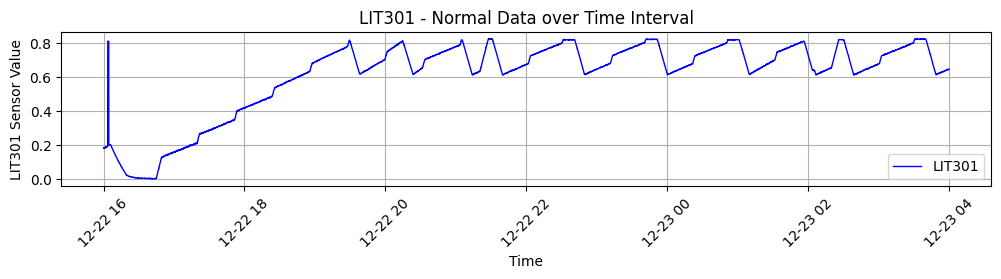

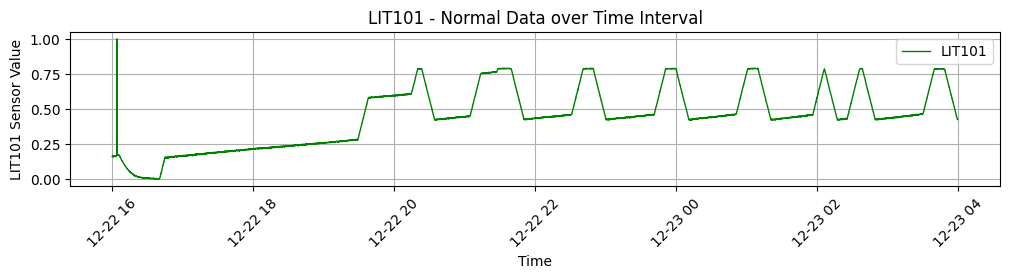

In [ ]:
# Plot LIT301
plt.figure(figsize=(12, 2))
plt.plot(time, lit301, label='LIT301', linewidth=1, color='blue')
plt.xlabel('Time')
plt.ylabel('LIT301 Sensor Value')
plt.title('LIT301 - Normal Data over Time Interval')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot LIT101
plt.figure(figsize=(12, 2))
plt.plot(time, lit101, label='LIT101', linewidth=1, color='green')
plt.xlabel('Time')
plt.ylabel('LIT101 Sensor Value')
plt.title('LIT101 - Normal Data over Time Interval')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
attack_data = data[data['Normal/Attack'] == 1]

attack_timestamps = attack_data['Timestamp'].unique()

start_time = '2015-12-29 16:33:17'
end_time =  '2015-12-29 22:02:43'
specific_interval_data = data[
    (data['Timestamp'] >= start_time) & (data['Timestamp'] <= end_time)
]

In [ ]:
start_time = '2015-12-29 16:33:17'
end_time =  '2015-12-29 22:02:43'

# Filter data for the time interval
filtered_data = data[
    (data['Timestamp'] >= start_time) & (data['Timestamp'] <= end_time)
]

# Filter for anomalies (anomaly == 1)
anomalies = filtered_data[filtered_data['Normal/Attack'] == 1]

# Get the date of the first anomaly
if not anomalies.empty:
    first_anomaly_date = anomalies['Timestamp'].iloc[0]  # Get the first timestamp
    print(f"The date of the first anomaly is: {first_anomaly_date}")
else:
    print("No anomalies found in the given time interval.")

The date of the first anomaly is: 2015-12-29 18:10:43


In [ ]:
if not anomalies.empty:
    last_anomaly_date = anomalies['Timestamp'].iloc[-1]  # Get the last timestamp
    print(f"The date of the last anomaly is: {last_anomaly_date}")
else:
    print("No anomalies found in the given time interval.")

The date of the last anomaly is: 2015-12-29 18:42:00


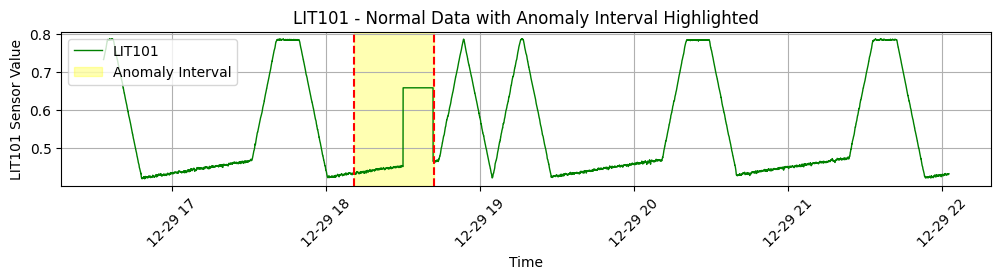

In [ ]:
lit101 = filtered_data['LIT101']
time = filtered_data['Timestamp']
# Plot LIT101
plt.figure(figsize=(12, 2))
plt.plot(time, lit101, label='LIT101', linewidth=1, color='green')

# Add vertical lines for the first and last anomaly
plt.axvline(first_anomaly_date, color='red', linestyle='--', linewidth=1.5)
plt.axvline(last_anomaly_date, color='red', linestyle='--', linewidth=1.5)

# Highlight the time interval between the first and last anomalies
plt.axvspan(first_anomaly_date, last_anomaly_date, color='yellow', alpha=0.3, label='Anomaly Interval')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('LIT101 Sensor Value')
plt.title('LIT101 - Normal Data with Anomaly Interval Highlighted')
plt.grid()
plt.xticks(rotation=45)
plt.legend(loc='upper left')  # Adjust legend location if needed
plt.show()

In [ ]:
attack_data = data[data['Normal/Attack'] == 1]

attack_timestamps = attack_data['Timestamp'].unique()

start_time = '2015-12-29 12:06:17'
end_time =  '2015-12-29 16:02:43'
# Filter data for the time interval

filtered_data = data[
    (data['Timestamp'] >= start_time) & (data['Timestamp'] <= end_time)
]

# Filter for anomalies (anomaly == 1)
anomalies = filtered_data[filtered_data['Normal/Attack'] == 1]

# Get the date of the first anomaly
if not anomalies.empty:
    first_anomaly_date = anomalies['Timestamp'].iloc[0]  # Get the first timestamp
    print(f"The date of the first anomaly is: {first_anomaly_date}")
else:
    print("No anomalies found in the given time interval.")


if not anomalies.empty:
    last_anomaly_date = anomalies['Timestamp'].iloc[-1]  # Get the last timestamp
    print(f"The date of the last anomaly is: {last_anomaly_date}")
else:
    print("No anomalies found in the given time interval.")

The date of the first anomaly is: 2015-12-29 14:38:12
The date of the last anomaly is: 2015-12-29 14:50:08


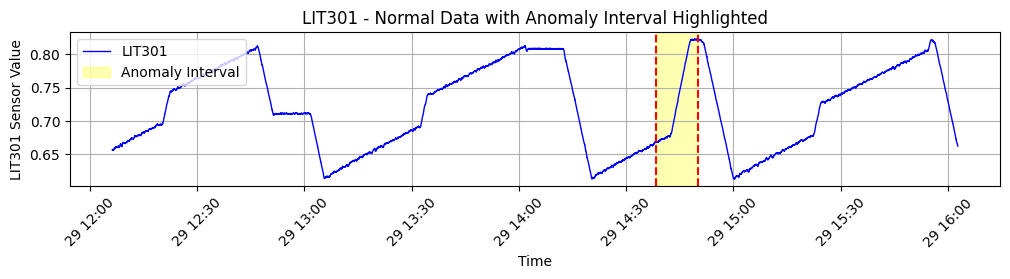

In [ ]:
lit301 = filtered_data['LIT301']
time = filtered_data['Timestamp']
# Plot LIT301
plt.figure(figsize=(12, 2))
plt.plot(time, lit301, label='LIT301', linewidth=1, color='blue')

# Add vertical lines for the first and last anomaly
plt.axvline(first_anomaly_date, color='red', linestyle='--', linewidth=1.5)
plt.axvline(last_anomaly_date, color='red', linestyle='--', linewidth=1.5)

# Highlight the time interval between the first and last anomalies
plt.axvspan(first_anomaly_date, last_anomaly_date, color='yellow', alpha=0.3, label='Anomaly Interval')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('LIT301 Sensor Value')
plt.title('LIT301 - Normal Data with Anomaly Interval Highlighted')
plt.grid()
plt.xticks(rotation=45)
plt.legend(loc='upper left')  # Adjust legend location if needed
plt.show()